<a href="https://colab.research.google.com/github/hasanwael2002/H3SAN/blob/main/MFP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install category_encoders
from category_encoders import HashingEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mydataset/h3s.csv')

In [ ]:
df.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Some Describtuon

In [ ]:
df.shape

(252000, 13)

In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


In [ ]:
duplicates = df.duplicated()
print(duplicates.sum())

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
def is_binary(column):
    return df[column].nunique() == 2

for column in df.select_dtypes(include='object').columns:
    if is_binary(column):
        print(f"df'{column}' is binary.")
    else:
        print(f"df'{column}'is not binary.")

df'Married/Single' is binary.
df'House_Ownership'is not binary.
df'Car_Ownership' is binary.
df'Profession'is not binary.
df'CITY'is not binary.
df'STATE'is not binary.


In [ ]:
df['Car_Ownership'] = (df['Car_Ownership'] == 'yes').astype(int)
df['Married/Single'] = (df['Married/Single'] == 'married').astype(int)

In [ ]:
df.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Some Charts

<Axes: >

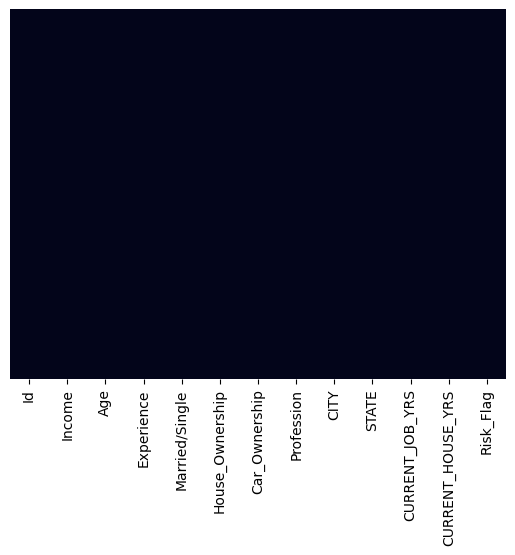

In [ ]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

<Axes: xlabel='Married/Single', ylabel='count'>

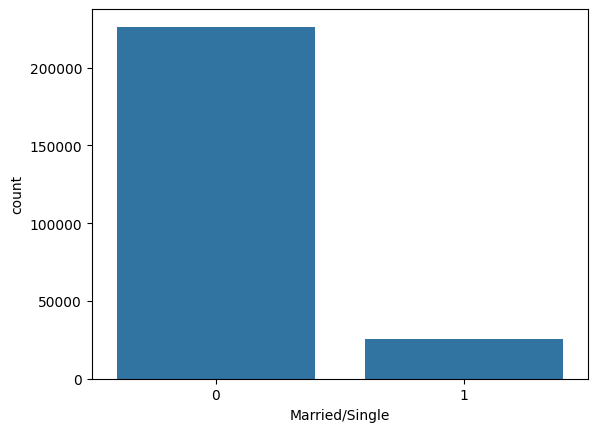

In [ ]:
sns.countplot(x='Married/Single', data=df)

<Axes: xlabel='Married/Single', ylabel='count'>

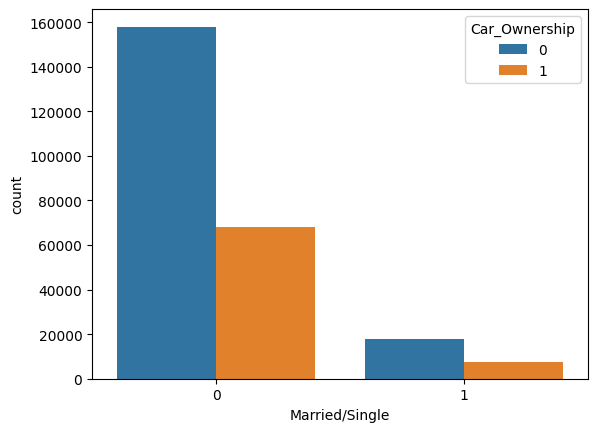

In [ ]:
sns.countplot(x = 'Married/Single', hue = 'Car_Ownership', data =df)

<Axes: xlabel='House_Ownership', ylabel='count'>

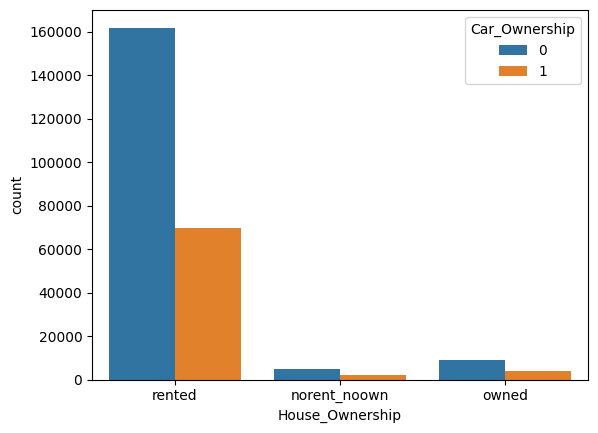

In [ ]:
sns.countplot(x = 'House_Ownership', hue = 'Car_Ownership', data =df)

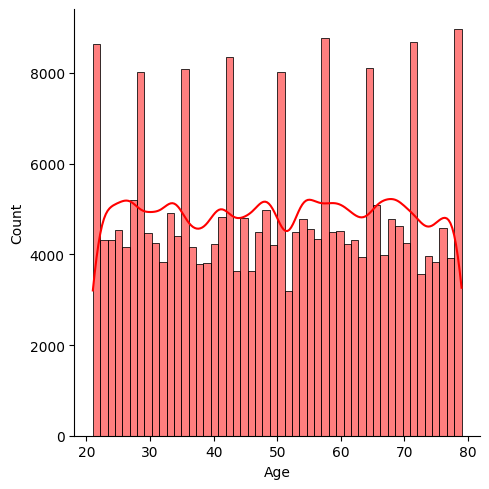

In [ ]:
sns.displot(df['Age'], kde=True, bins = 50, color = 'red')

<Axes: xlabel='House_Ownership', ylabel='Income'>

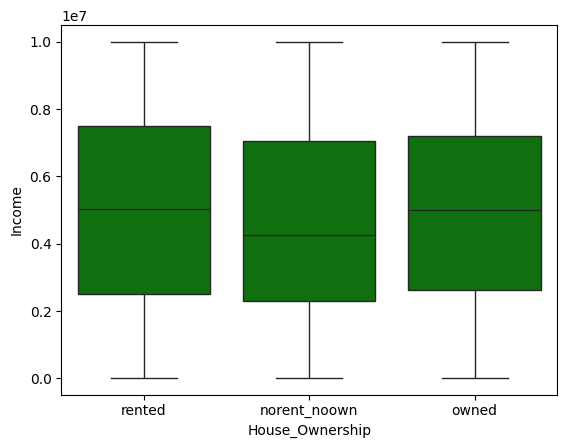

In [ ]:
sns.boxplot(x = 'House_Ownership', y = 'Income', data = df, color = 'green')

([<matplotlib.patches.Wedge at 0x7c5eec7cf070>,
 [Text(-1.0656389922568725, 0.27278844950209524, 'rented'),
  Text(1.0369696920508071, -0.36700661815293545, 'norent_noown'),
  Text(1.09559136493431, -0.09838476041224982, 'owned')],
 [Text(-0.5812576321401123, 0.14879369972841558, '92.02%'),
  Text(0.5656198320277129, -0.2001854280834193, '5.13%'),
  Text(0.597595289964169, -0.053664414770318074, '2.85%')])

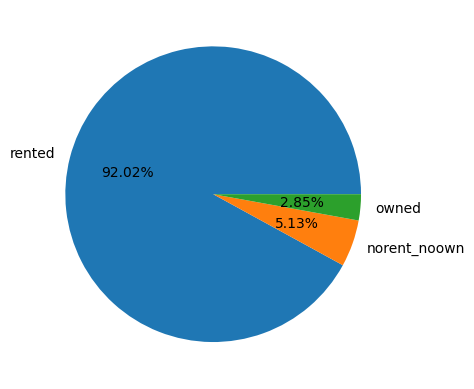

In [ ]:
plt.pie(df['House_Ownership'].value_counts(), labels = df['House_Ownership'].unique(), autopct = '%.2f%%')

Text(0.5, 1.0, 'Distribution of Years of Experience')

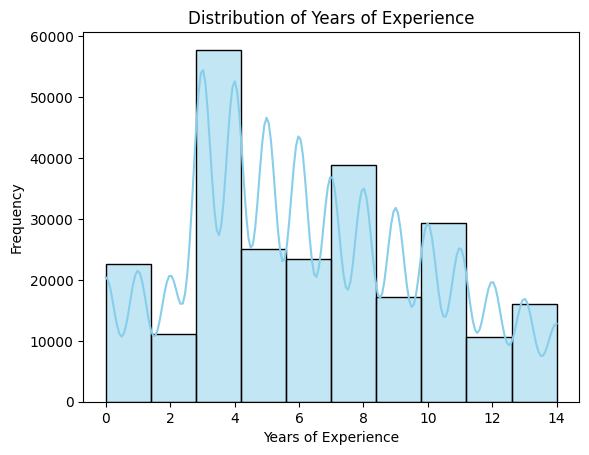

In [ ]:
sns.histplot(df['CURRENT_JOB_YRS'], hue = '', bins=10, kde=True, color='skyblue')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')

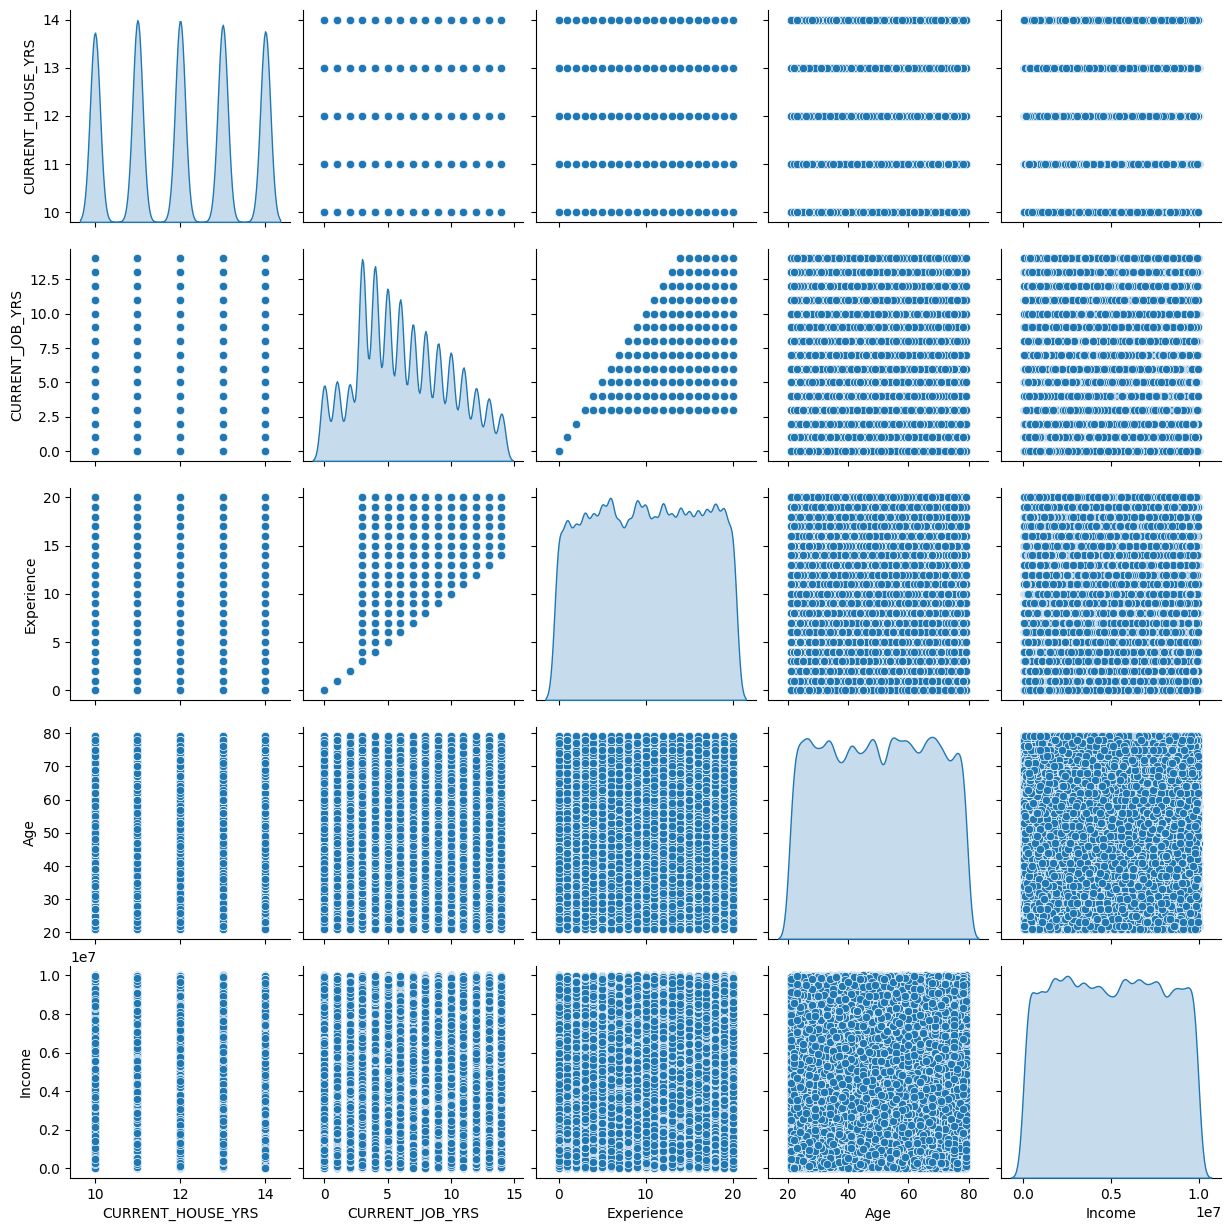

In [ ]:
cols = ['CURRENT_HOUSE_YRS', 'CURRENT_JOB_YRS', 'Experience', 'Age', 'Income']
sns.pairplot(df[cols], diag_kind='kde')
plt.show()

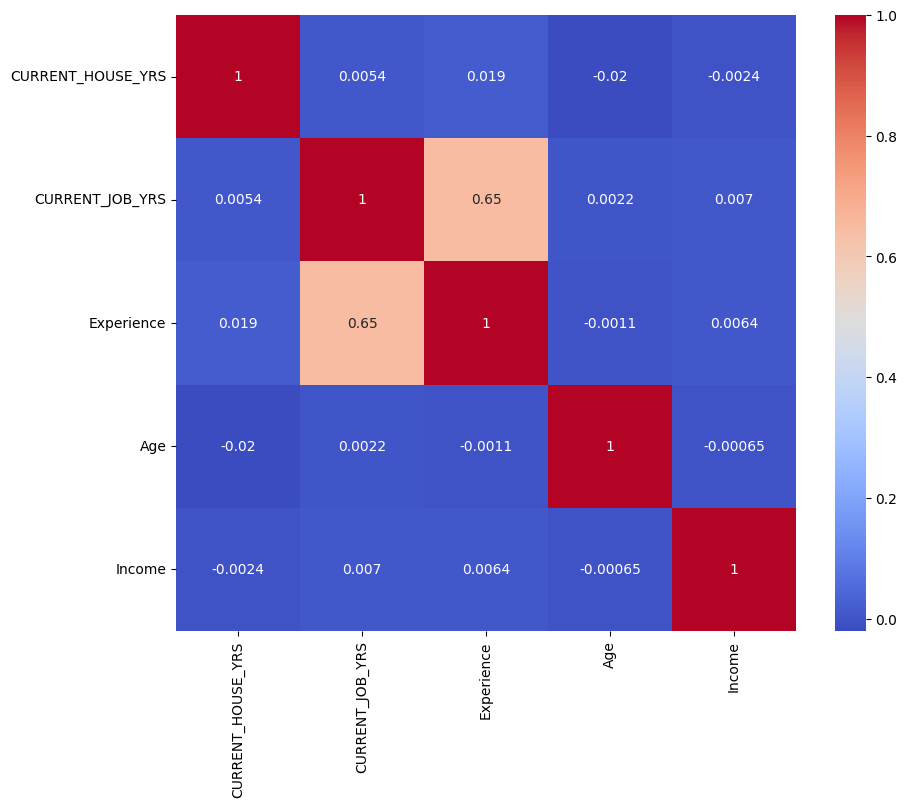

In [ ]:
cols = ['CURRENT_HOUSE_YRS', 'CURRENT_JOB_YRS', 'Experience', 'Age', 'Income']
corr = df[cols].corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
corr = df[cols].corr()
corr

,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Age,Income
CURRENT_HOUSE_YRS,1.000000,0.005372,0.019309,-0.020134,-0.002397
CURRENT_JOB_YRS,0.005372,1.000000,0.646098,0.002154,0.007045
Experience,0.019309,0.646098,1.000000,-0.001118,0.006422
Age,-0.020134,0.002154,-0.001118,1.000000,-0.000652
Income,-0.002397,0.007045,0.006422,-0.000652,1.000000


In [ ]:
city_values = df['CITY'].value_counts()
print(city_values)

CITY
Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: count, Length: 317, dtype: int64


In [ ]:
unique_values = df['CITY'].unique()
print(unique_values)

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bellary' 'Danapur' 'Purnia[26]' 'Bijapur' 'Patiala' 'Malda' 'Sagar'
 'Durgapur' 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur'
 'Naihati' 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda'
 'Nadiad' 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru[25]'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhikode'

In [ ]:
value_counts = df['Profession'].value_counts()
print(value_counts)

Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

In [ ]:
unique_values = df['House_Ownership'].unique()
print(unique_values)

['rented' 'norent_noown' 'owned']


In [ ]:
values_counts = df['STATE'].value_counts()
print(values_counts)

STATE
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64


In [ ]:
df = pd.DataFrame(df)
encoders = HashingEncoder(n_components = 2)
hashed_features = encoders.fit_transform(df[['Profession', 'CITY', 'STATE']])
df = pd.concat([df.drop(['Profession', 'CITY', 'STATE'], axis = 1).reset_index(drop = True), hashed_features.reset_index(drop = True)], axis = 1)
print(df)

            Id   Income  Age  Experience  Married/Single House_Ownership  \
0            1  1303834   23           3               0          rented   
1            2  7574516   40          10               0          rented   
2            3  3991815   66           4               1          rented   
3            4  6256451   41           2               0          rented   
4            5  5768871   47          11               0          rented   
...        ...      ...  ...         ...             ...             ...   
251995  251996  8154883   43          13               0          rented   
251996  251997  2843572   26          10               0          rented   
251997  251998  4522448   46           7               0          rented   
251998  251999  6507128   45           0               0          rented   
251999  252000  9070230   70          17               0          rented   

        Car_Ownership  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  col_0  \
0       

In [ ]:
df.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,col_0,col_1
0,1,1303834,23,3,0,rented,0,3,13,0,2,1
1,2,7574516,40,10,0,rented,0,9,13,0,1,2
2,3,3991815,66,4,1,rented,0,4,10,0,2,1
3,4,6256451,41,2,0,rented,1,2,12,1,0,3
4,5,5768871,47,11,0,rented,0,3,14,1,1,2


In [ ]:
x = pd.DataFrame({'House_Ownership':['rented', 'norent_noown', 'owned']})
df = pd.get_dummies(df,columns = ['House_Ownership']).astype(int)
print(df_encoded)

            Id   Income  Age  Experience  Married/Single  Car_Ownership  \
0            1  1303834   23           3               0              0   
1            2  7574516   40          10               0              0   
2            3  3991815   66           4               1              0   
3            4  6256451   41           2               0              1   
4            5  5768871   47          11               0              0   
...        ...      ...  ...         ...             ...            ...   
251995  251996  8154883   43          13               0              0   
251996  251997  2843572   26          10               0              0   
251997  251998  4522448   46           7               0              0   
251998  251999  6507128   45           0               0              0   
251999  252000  9070230   70          17               0              0   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  col_0  col_1  \
0                     3     

In [ ]:
df.head(5)

,Id,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,col_0,col_1,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,1303834,23,3,0,0,3,13,0,2,1,0,0,1
1,2,7574516,40,10,0,0,9,13,0,1,2,0,0,1
2,3,3991815,66,4,1,0,4,10,0,2,1,0,0,1
3,4,6256451,41,2,0,1,2,12,1,0,3,0,0,1
4,5,5768871,47,11,0,0,3,14,1,1,2,0,0,1


ML

In [ ]:
x = df.drop('Married/Single', axis = 1)
y = df['Married/Single']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     45319
           1       0.00      0.00      0.00      5081

    accuracy                           0.90     50400
   macro avg       0.45      0.50      0.47     50400
weighted avg       0.81      0.90      0.85     50400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     45319
           1       0.20      0.04      0.06      5081

    accuracy                           0.89     50400
   macro avg       0.55      0.51      0.50     50400
weighted avg       0.83      0.89      0.85     50400



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     45319
           1       0.00      0.00      0.00      5081

    accuracy                           0.90     50400
   macro avg       0.45      0.50      0.47     50400
weighted avg       0.81      0.90      0.85     50400



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     45319
           1       0.00      0.00      0.00      5081

    accuracy                           0.90     50400
   macro avg       0.45      0.50      0.47     50400
weighted avg       0.81      0.90      0.85     50400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Great Work